In [2]:
library(ggraph)
library(igraph)

Loading required package: ggplot2


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




### Nodos

In [ ]:
# Crear un grafo de muestra
g <- erdos.renyi.game(20, 0.2)

# Calcular la detección de comunidades con igraph
communities <- cluster_louvain(g)

# Convertir el resultado en un factor para la coloración
membership <- as.factor(membership(communities))

# Visualizar el grafo con ggraph y colorear por comunidad
ggraph(g, layout = "kk") +
    geom_edge_link() +
    geom_node_point(aes(color = membership)) +
    theme_void() +
    scale_color_manual(values = rainbow(max(as.numeric(membership))))

# Graficas de Arboles

In [ ]:
install.packages("tidyverse")
install.packages("treemapify")

Multiple parents. Unfolding graph


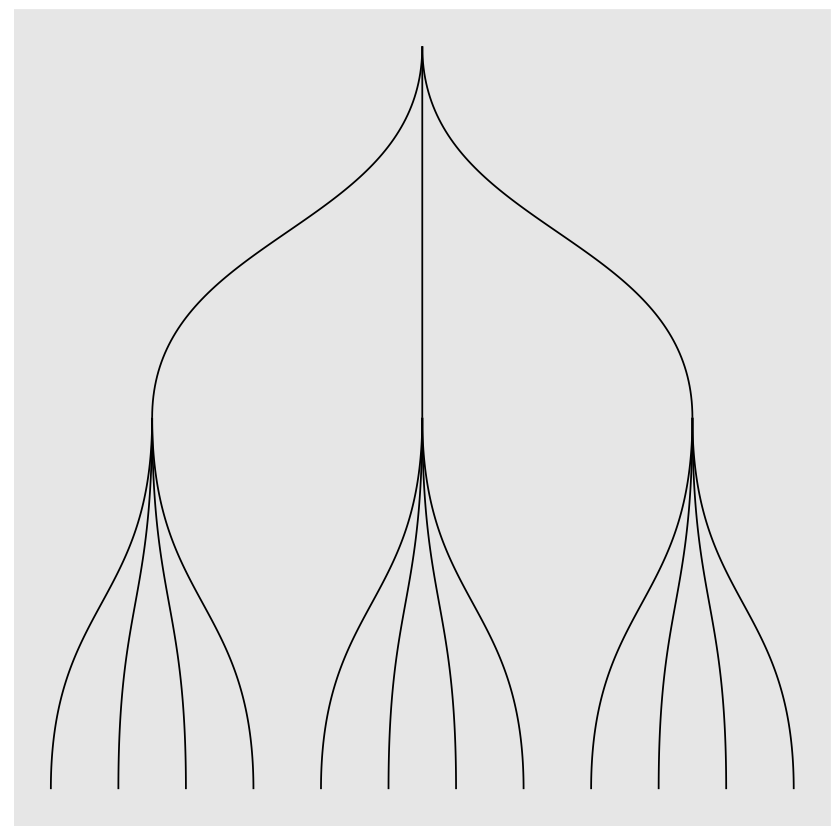

In [6]:
library(ggraph)
library(igraph)
library(tidyverse)

#*Creación del data frame d1 con conexiones desde "raiz" a nodos intermedios
d1 <- data.frame(from = "raiz", to = paste("nodo_intermedio", seq(1, 3), sep = ""))

# Creación del data frame d2 con conexiones desde nodos intermedios a nodos hoja
d2 <- data.frame(from = rep(d1$to, each = 4), to = paste("hoja", seq(1, 4), sep = "_"))

# Combinación de los data frames d1 y d2 para obtener todas las conexiones (edges) del grafo
edges <- rbind(d1, d2)

# Creación del grafo (g) a partir de los datos en el data frame edges
g <- graph_from_data_frame(edges)

# Ahora g es un objeto de tipo grafo (graph) creado a partir de las conexiones definidas en edges


#* Arbol básico
ggraph(g, layout = "dendrogram") +
    geom_edge_diagonal()

# Ahora con los nombres

Multiple parents. Unfolding graph


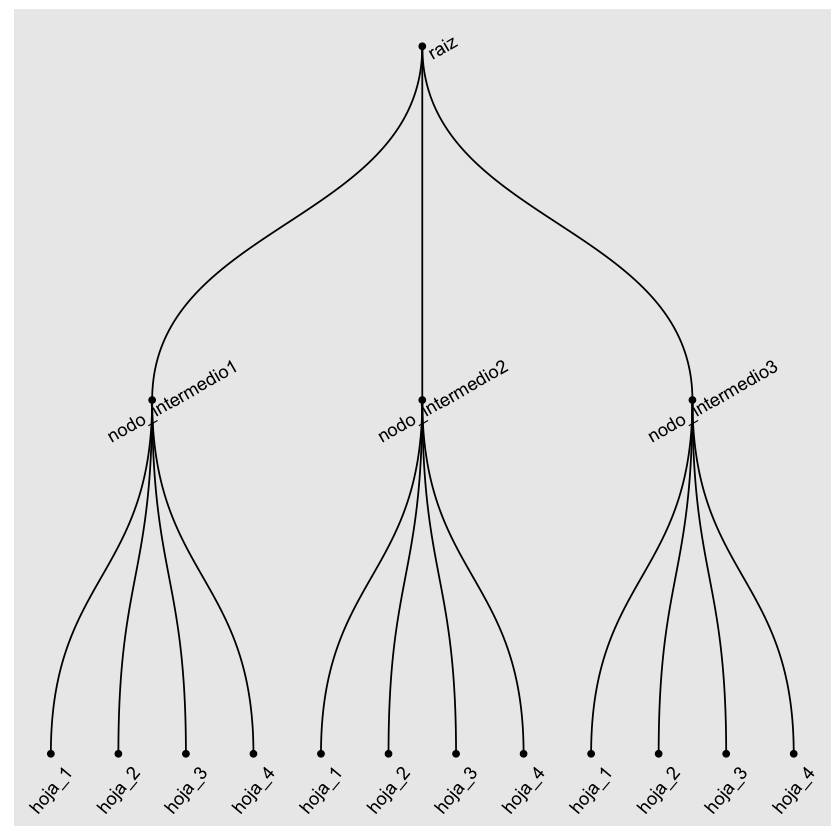

In [7]:
ggraph(g, layout = "dendrogram") + geom_edge_diagonal() +
    geom_node_point() +
    geom_node_text(aes(label = name, filter = leaf), #* en geom_node_text se ponen los nombres que esten
        nudge_y = -0.1, angle = 50
    ) +
    geom_node_text(aes(label = name, filter = !leaf),
        nudge_x = 0.3, angle = 30
    )

## **Importante** 
El parametro `layout`Es el que determina si el arbol es un treemap, endograma, icicle o sunburst

## Treemaps
Requisistos: `library(treemapify)`

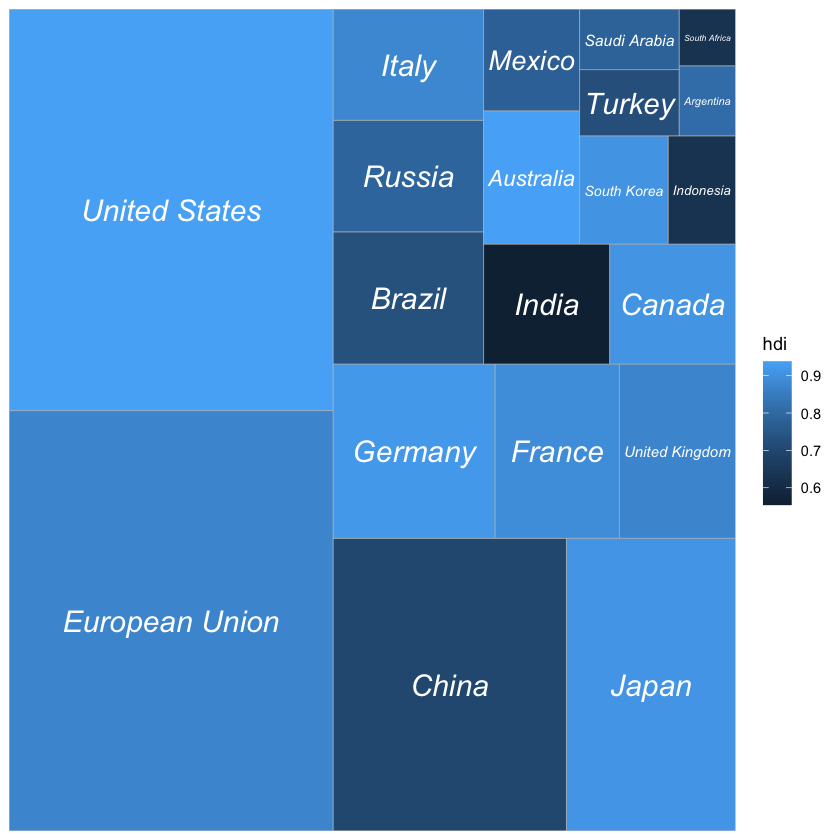

In [8]:
library(treemapify)
datos <- G20

ggplot(datos, aes(area = gdp_mil_usd, fill = hdi, label = country)) +
    geom_treemap() +
    geom_treemap_text(fontface = "italic", color = "white", place = "center")

## Agregango nombres y jerarquias

Warning message in geom_treemap_subgroup_text(place = "center", row = T, alpha = 0.5, :
"Ignoring unknown parameters: `row`"


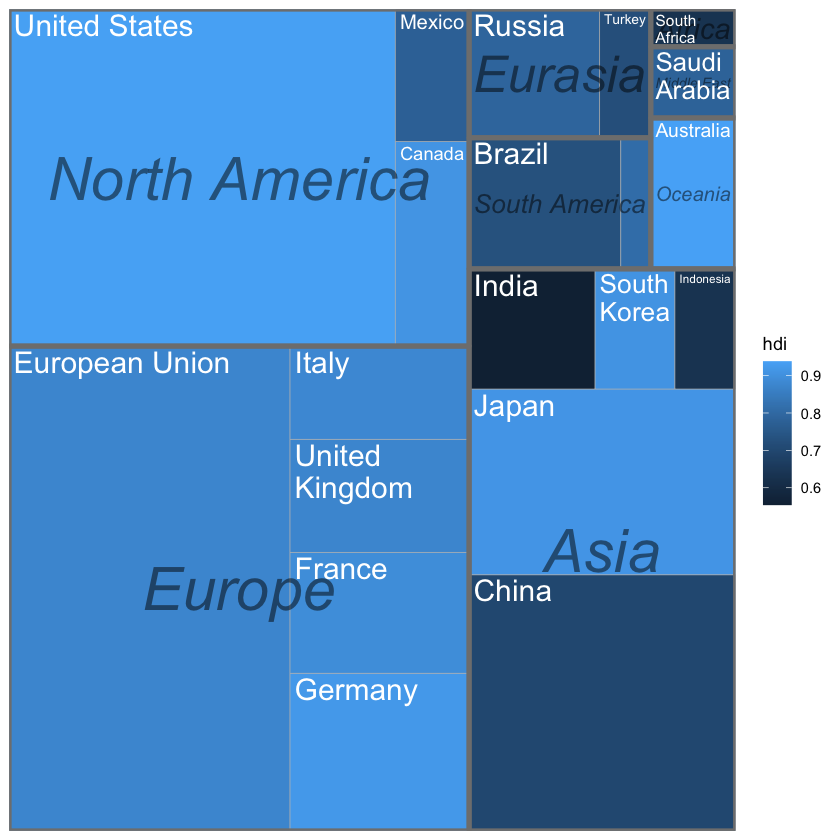

In [9]:
ggplot(datos, aes(area = gdp_mil_usd, fill = hdi, label = country, subgroup = region)) +
    geom_treemap() +
    geom_treemap_subgroup_border() +
    geom_treemap_subgroup_text(
        place = "center", row = T, alpha = 0.5, color = "black",
        fontface = "italic", min.size = 0
    ) +
    geom_treemap_text(color = "white", place = "topleft", reflow = T)


# Con icicle
Se usan las librerias ggraph con el ` parametro de "partition" `

Multiple parents. Unfolding graph


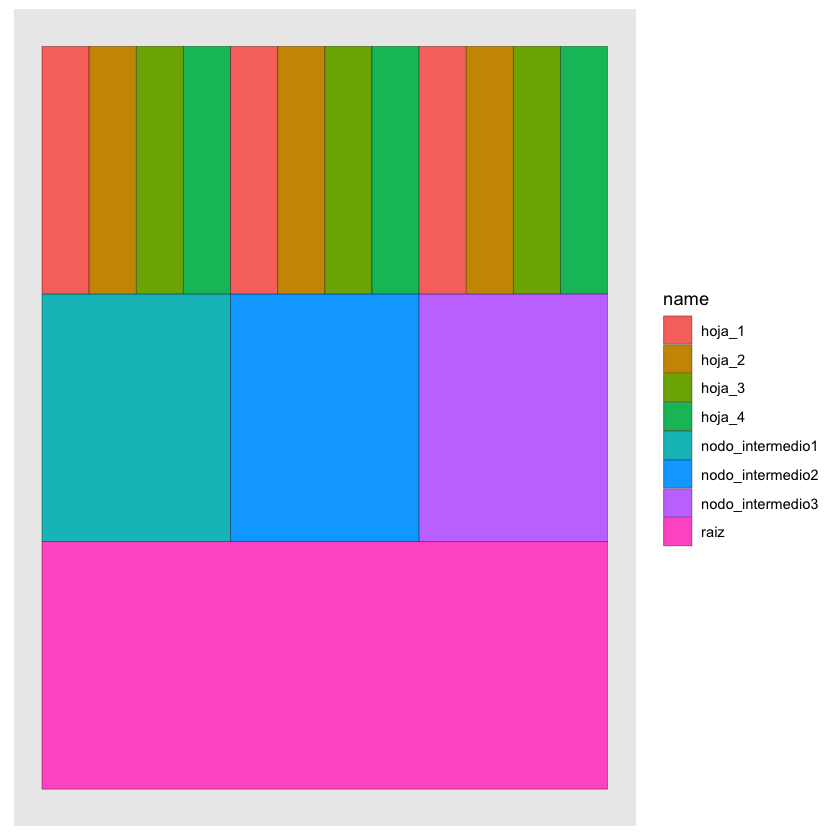

In [3]:
# Conexiones
d1 <- data.frame(from = "raiz", to = paste(
    "nodo_intermedio", seq(1, 3),
    sep = ""
))
d2 <- data.frame(from = rep(d1$to, each = 4), to = paste("hoja", seq(1, 4), sep = "_"))
edges <- rbind(d1, d2)

g <- graph_from_data_frame(edges)

# lcicle
ggraph(g, "partition") +
    geom_node_tile(aes(fill = name))
